In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL # this is python image libraries
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Load the data set

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/7630520686_e3a61ac763.jpg'),
 PosixPath('datasets/flower_photos/daisy/4440480869_632ce6aff3_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/144603918_b9de002f60_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/2077865117_9ed85191ae_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/2509545845_99e79cb8a2_n.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]


[PosixPath('datasets/flower_photos/roses/8692040971_826614516f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5731750490_ba3325b7ee_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/3829990289_c0c3821e4d_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5212885371_fe27c406a2_n.jpg')]

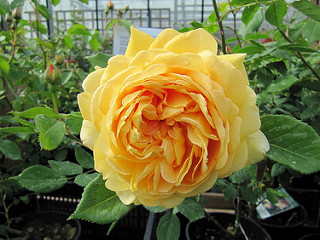

In [ ]:
PIL.Image.open(str(roses[1]))

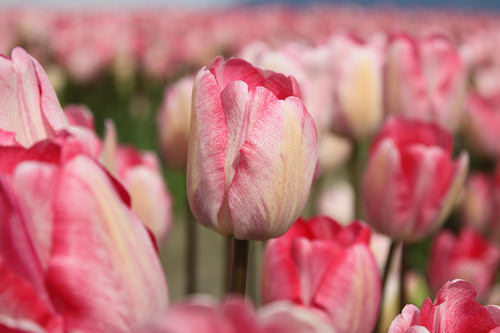

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))


Read flowers images from disk into numpy array using opencv

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/8692040971_826614516f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5731750490_ba3325b7ee_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/3829990289_c0c3821e4d_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5212885371_fe27c406a2_n.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])


'datasets/flower_photos/roses/8692040971_826614516f_n.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))


In [ ]:
img.shape

(227, 320, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

Train test the datasets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Preprocessing:  images scale

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


Build convolutional neural network and train it

In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


 Train the models

In [ ]:
model.compile(optimizer='adam')


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 88s 997ms/step - loss: 1.2341 - accuracy: 0.4771
Epoch 2/30
86/86 [==============================] - 85s 990ms/step - loss: 0.9402 - accuracy: 0.6344
Epoch 3/30
86/86 [==============================] - 86s 997ms/step - loss: 0.7507 - accuracy: 0.7133
Epoch 4/30
86/86 [==============================] - 85s 985ms/step - loss: 0.5546 - accuracy: 0.7951
Epoch 5/30
86/86 [==============================] - 86s 999ms/step - loss: 0.3665 - accuracy: 0.8725
Epoch 6/30
86/86 [==============================] - 86s 997ms/step - loss: 0.2107 - accuracy: 0.9342
Epoch 7/30
86/86 [==============================] - 86s 996ms/step - loss: 0.1340 - accuracy: 0.9604
Epoch 8/30
86/86 [==============================] - 90s 1s/step - loss: 0.1214 - accuracy: 0.9633
Epoch 9/30
86/86 [==============================] - 87s 1s/step - loss: 0.0480 - accuracy: 0.9880
Epoch 10/30
86/86 [==============================] - 86s 1s/step - loss: 0.0282 - accuracy: 0.993

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 9s 287ms/step - loss: 2.5699 - accuracy: 0.6503


[2.5699403285980225, 0.6503267884254456]

 Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

array([[  0.30000323,   2.0513182 ,   3.7857053 ,  -4.4114203 ,
         -0.76006037],
       [  2.566002  ,   1.386712  ,  -1.2014675 ,  -4.901239  ,
          4.6533074 ],
       [ -4.964904  ,  -3.439975  ,   5.894329  ,   3.841691  ,
          0.8817802 ],
       ...,
       [-13.271419  ,   0.0423526 ,   9.558157  ,  17.749542  ,
         -8.590891  ],
       [  9.297685  ,  -2.3372688 , -11.906894  ,   7.6193557 ,
          3.0853148 ],
       [ -4.1470356 ,  -0.42130122,   6.2599306 ,   3.1038146 ,
         -0.20795503]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

2

In [ ]:

y_test[0]

1

## Improve Test Accuracy Using Data Augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_Height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

NameError: ignored